In [13]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, f_classif, VarianceThreshold
from sklearn.linear_model import Ridge,LogisticRegression


In [14]:
#importing functions for model training
from config import BASE_PROCESSED_PATH

from models import model_configs, train_model, save_model,select_top_features
from evaluate import regression_metrics, classification_metrics


In [15]:
df = pd.read_csv(f'{BASE_PROCESSED_PATH}/FD001/train_FD001_engineered.csv')
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_11_roll_std,sensor_12_roll_mean,sensor_12_roll_std,sensor_14_roll_std,sensor_17_roll_mean,sensor_17_roll_std,sensor_20_roll_mean,sensor_20_roll_std,sensor_21_roll_mean,sensor_21_roll_std
0,1,3,-0.0043,0.0003,100.0,0.343373,0.369523,0.370527,0.710145,0.140043,...,0.410022,0.777311,0.381495,0.350063,0.20,0.377964,0.774648,0.184166,0.746476,0.199068
1,1,4,0.0007,0.0000,100.0,0.343373,0.256159,0.331195,0.740741,0.124518,...,0.611638,0.878151,0.285460,0.113125,0.20,0.377964,0.711268,0.201559,0.719427,0.178751
2,1,5,-0.0019,-0.0002,100.0,0.349398,0.257467,0.404625,0.668277,0.149960,...,0.282655,0.870588,0.321099,0.030044,0.24,0.500000,0.676056,0.120565,0.707911,0.133077
3,1,6,-0.0043,-0.0001,100.0,0.268072,0.292784,0.272113,0.776167,0.125415,...,0.267514,0.808403,0.558183,0.050808,0.28,0.327327,0.686620,0.176941,0.721526,0.086742
4,1,7,0.0010,0.0001,100.0,0.382530,0.463920,0.261985,0.723027,0.167818,...,0.339276,0.763025,0.319061,0.069040,0.28,0.327327,0.764085,0.336610,0.723625,0.084034


In [16]:
df_test = pd.read_csv(f'{BASE_PROCESSED_PATH}/FD001/test_FD001_engineered.csv')
df_test.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_11_roll_mean,sensor_11_roll_std,sensor_12_roll_mean,sensor_12_roll_std,sensor_14_roll_mean,sensor_14_roll_std,sensor_17_roll_mean,sensor_17_roll_std,sensor_20_roll_mean,sensor_20_roll_std
0,1,31,-0.0006,0.0004,100.0,0.364035,0.140105,0.245075,0.844869,0.230295,...,0.186620,0.405698,0.831066,0.458244,0.169968,0.305075,0.235294,0.500000,0.851675,0.684969
1,2,49,0.0018,-0.0001,100.0,0.350877,0.315480,0.550013,0.630072,0.139535,...,0.383803,0.469732,0.755102,0.608850,0.115434,0.186063,0.176471,0.288675,0.736842,0.415868
2,3,126,-0.0016,0.0004,100.0,0.495614,0.418681,0.756204,0.408115,0.174575,...,0.559859,0.614885,0.362812,0.553108,0.153846,0.371367,0.705882,0.288675,0.492823,0.895689
3,4,106,0.0012,0.0004,100.0,0.451754,0.574788,0.448964,0.420048,0.190495,...,0.528169,0.046485,0.615646,0.643892,0.185438,0.075109,0.588235,0.866025,0.468900,0.698281
4,5,98,-0.0013,-0.0004,100.0,0.228070,0.424886,0.768227,0.575179,0.211487,...,0.383803,0.761397,0.544218,0.339646,0.130838,0.344028,0.529412,0.288675,0.545455,0.389938


In [17]:
#seperating features and target variables
X = df.drop(columns=['RUL','label'],axis=1)
Y_reg = df['RUL']
Y_clf = df['label']

In [18]:
#splitting data into train and test data
#regression
X_train_reg,X_test_reg,Y_train_reg,Y_test_reg = train_test_split(X,Y_reg,random_state=42,test_size=0.2)

#classfication
X_train_clf,X_test_clf,Y_train_clf,Y_test_clf = train_test_split(X,Y_clf,random_state=42,test_size=0.2)


In [19]:
print(X_test_reg.shape)

(4087, 63)


In [ ]:
#selecting top features for regression
model_reg = Ridge(alpha=1.0)
k_range = range(5, X_train_reg.shape[1]+1, 5)

best_k_reg, selected_features_reg = select_top_features(
    X_train_reg, Y_train_reg, model_reg, k_range,
    score_func=f_regression,
    scoring='neg_root_mean_squared_error'
)

X_train_reg_selected = X_train_reg[selected_features_reg]
X_test_reg_selected = X_test_reg[selected_features_reg]

print(X_test_reg_selected)
print(X_test_reg_selected.shape)


       unit_number  time_in_cycles  sensor_2  sensor_3  sensor_4  sensor_7  \
19631           96             272  0.527108  0.318509  0.539500  0.410628   
16223           82              10  0.108434  0.216699  0.231431  0.797101   
7646            40              89  0.481928  0.474602  0.602802  0.513688   
1402             7             113  0.406627  0.213429  0.347569  0.700483   
1328             7              39  0.355422  0.246130  0.359048  0.674718   
...            ...             ...       ...       ...       ...       ...   
8204            43              53  0.391566  0.411380  0.195982  0.723027   
6206            32              50  0.316265  0.342054  0.376772  0.587762   
2974            15             116  0.385542  0.390015  0.336090  0.626409   
13314           68              19  0.289157  0.316547  0.431128  0.529791   
14655           74              40  0.310241  0.246784  0.321911  0.731079   

       sensor_9  sensor_11  sensor_12  sensor_17  ...  sensor_2

In [21]:
print(X_test_clf.shape)

(4087, 63)


In [22]:
#selecting top features for classification

#Remove constant features
constant_filter = VarianceThreshold(threshold=0.0)
X_train_clf = constant_filter.fit_transform(X_train_clf)
X_test_clf = constant_filter.transform(X_test_clf)

#getting top features
model_clf = LogisticRegression(max_iter=1000)
k_range = range(5, X_train_clf.shape[1]+1, 5)

best_k_clf, selected_features_clf = select_top_features(
    X_train_clf, Y_train_clf, model_clf, k_range,
    score_func=f_classif,
    scoring='accuracy'  
)

X_train_clf_selected = X_train_clf[selected_features_clf]
X_test_clf_selected = X_test_clf[selected_features_clf]

print(X_test_clf_selected)
print(X_test_clf_selected.shape)

[[ 8.20000000e+01  1.00000000e+01  2.00000000e-04 ...  3.29333688e-01
   7.85701433e-01  8.08939916e-01]
 [ 7.00000000e+00  3.90000000e+01  6.50000000e-03 ...  2.84393411e-01
   7.42757752e-01  1.93013607e-01]
 [ 8.10000000e+01  1.26000000e+02 -7.00000000e-04 ...  3.39366448e-01
   4.56726444e-01  2.79540088e-01]
 ...
 [ 7.60000000e+01  6.80000000e+01  4.30000000e-03 ...  3.34944547e-01
   5.39674924e-01  3.05341549e-01]
 [ 2.70000000e+01  3.60000000e+01 -2.20000000e-03 ...  1.26597139e-01
   6.55011096e-01  2.79746676e-01]
 [ 3.80000000e+01  8.50000000e+01 -1.40000000e-03 ...  2.52457175e-01
   5.79139927e-01  1.21794256e-01]]
(45, 62)


In [ ]:
results = []

for name,config in model_configs.items():

    #choosing the best model
    if name in ['ridge','lasso','rf_reg','polynomial']:
        task = 'regression'
        X_train,X_test,Y_train,Y_test = X_train_reg,X_test_reg,Y_train_reg,Y_test_reg
    else: 
        task = 'classification'
        X_train,X_test,Y_train,Y_test = X_train_clf,X_test_clf,Y_train_clf,Y_test_clf

    best_model, best_params, best_score = train_model(X_train,Y_train,config['model'],config['params'],task)
    preds = best_model.predict(X_test)

    #evaluating the best model
    if task == 'regression':
        metrics = regression_metrics(Y_test,preds)
    else: 
        preds = (preds > 0.5).astype(int) if hasattr(preds,"dtype") else preds
        metrics = classification_metrics(Y_test,preds)

    results.append({
        "model":name,
        "params":best_params,
        "score":best_score,
        "metrics":metrics
    })

    save_model(best_model,name)


In [ ]:
results_df = pd.DataFrame(results)
results_df

,model,params,score,metrics
0,ridge,{'ridge__alpha': 10.0},-1566.217235,"{'MAE:': 29.775763591011234, 'RMSE:': 38.57229..."


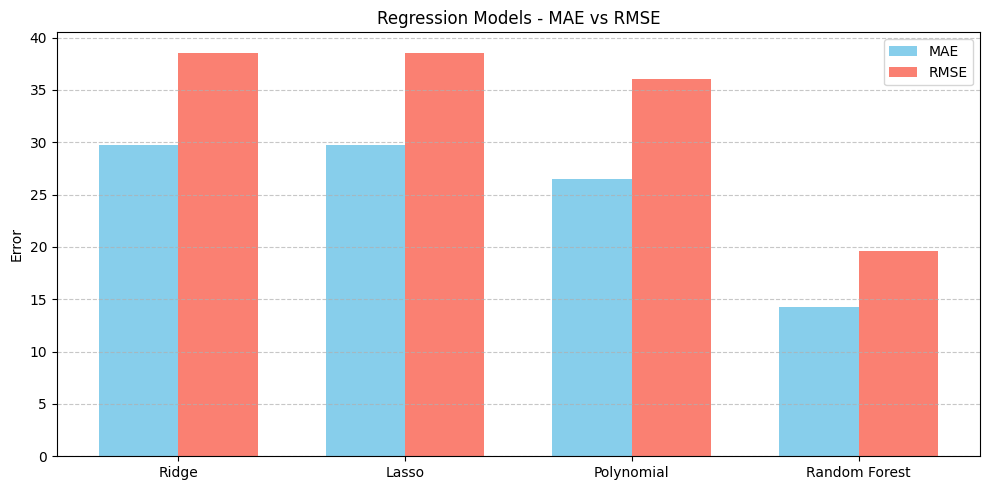

In [25]:
#Plot for Regression Models
regression_models = ['Ridge', 'Lasso', 'Polynomial', 'Random Forest']

# Corresponding MAE and RMSE values
mae_scores = [29.77, 29.75, 26.47, 14.26]
rmse_scores = [38.57, 38.56, 36.01, 19.64]

x = range(len(regression_models))
width = 0.35

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(x, mae_scores, width=width, label='MAE', color='skyblue')
plt.bar([p + width for p in x], rmse_scores, width=width, label='RMSE', color='salmon')
plt.xticks([p + width/2 for p in x], regression_models)
plt.ylabel("Error")
plt.title("Regression Models - MAE vs RMSE")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


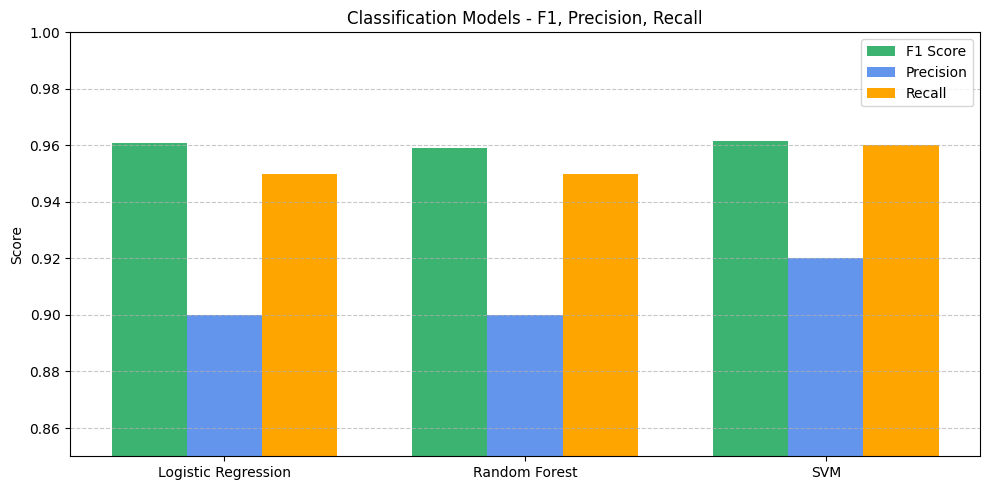

In [26]:
#Plot for Classification Models
classification_models = ['Logistic Regression', 'Random Forest', 'SVM']

# Corresponding F1 scores, precision, and recall
f1_scores = [0.9607, 0.9589, 0.9616]
precision_scores = [0.90, 0.90, 0.92]
recall_scores = [0.95, 0.95, 0.96]

x = range(len(classification_models))
width = 0.25

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(x, f1_scores, width=width, label='F1 Score', color='mediumseagreen')
plt.bar([p + width for p in x], precision_scores, width=width, label='Precision', color='cornflowerblue')
plt.bar([p + width*2 for p in x], recall_scores, width=width, label='Recall', color='orange')
plt.xticks([p + width for p in x], classification_models)
plt.ylabel("Score")
plt.ylim(0.85, 1.0)
plt.title("Classification Models - F1, Precision, Recall")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
